# German Electricity Data :electric_plug:

- Data Source: [SMARD Web Portal](https://www.smard.de/) 
- Task: forecasting \(using the past to predict the future\)
- Language: [julia](https://julialang.org)

## First steps:

- load the data \(with appropriate column types\) :heavy_check_mark: 
- split the data into train/val/test sets
- plot the time series \(at different temporal resolution\)
- calculate the mean production per month
- is there a seasonal pattern \(what kinds of seasonalities\)
- make a prediction for the validation set
- evaluate the quality of the prediction



In [3]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
set.seed(42)
"A B C D E F" %>%  str_split(" ") %>% unlist %>% sample %>% str_c(collapse=" → ")

[1] "A → E → F → D → B → C"

## 1. Data loading

- load the hourly data from the file `Realisierte_Erzeugung_201501010000_202305301300_Stunde.csv` as a table into R :heavy_check_mark:
- make sure, that data is interpreted and typed correctly :heavy_check_mark:
- clean header names :heavy_check_mark:
- create column `Time` containing the combined info from `Datum` and `Anfang`



In [11]:
data <- read_csv2(
    "../data_dojo_22/Realisierte_Erzeugung_201501010000_202305301300_Stunde.csv",
    col_types=cols(`Datum` = col_date("%d.%m.%Y")),
    na="-"
)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.



In [12]:
colnames(data) <- colnames(data) %>% str_remove(" \\[.*") %>% str_replace(" ","_")

In [13]:
data

Datum,Anfang,Ende,Biomasse,Wasserkraft,Wind_Offshore,Wind_Onshore,Photovoltaik,Sonstige_Erneuerbare,Kernenergie,Braunkohle,Steinkohle,Erdgas,Pumpspeicher,Sonstige_Konventionelle
<date>,<time>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-01-01,00:00:00,01:00:00,4024.25,1158.25,516.50,8128.00,0.00,133.00,10710.50,15687.25,3219.75,1226.25,1525.75,4909.25
2015-01-01,01:00:00,02:00:00,3982.75,1188.00,516.25,8297.50,0.00,122.50,11086.25,15321.75,2351.25,870.75,1079.25,4932.75
2015-01-01,02:00:00,03:00:00,4019.50,1139.25,514.00,8540.00,0.00,93.00,11026.25,14817.50,2227.00,809.50,787.00,5041.75
2015-01-01,03:00:00,04:00:00,4040.75,1122.50,517.75,8552.00,0.00,86.50,11027.75,14075.00,2339.75,821.00,287.75,5084.00
2015-01-01,04:00:00,05:00:00,4037.75,1112.00,519.75,8643.50,0.00,86.50,10962.25,14115.00,2461.50,831.25,346.75,5070.75
2015-01-01,05:00:00,06:00:00,4028.25,1107.75,520.00,8711.75,0.00,86.75,10696.00,13474.25,2217.75,851.00,765.50,5096.75
2015-01-01,06:00:00,07:00:00,4013.25,1111.75,521.50,9167.25,0.00,87.00,10299.50,12403.75,2373.25,868.25,414.50,5153.00
2015-01-01,07:00:00,08:00:00,4012.75,1113.75,520.25,9811.00,0.00,87.00,10035.25,12062.50,2491.00,876.00,582.50,5161.00
2015-01-01,08:00:00,09:00:00,3999.75,1107.50,525.25,9683.00,53.00,87.00,10245.75,12405.00,2530.25,888.25,750.50,5393.50


### Todo 2<sup>nd</sup> session

- Create `Time` column
- Split into training/validation/test set
- Plot the training set with hourly resolution
- Aggregate by day/month
- Plot aggregated data

<details>
    <summary>Bonus task</summary>
    <ul>
        <li>did you observe something peculiar with dates and times?</li>
        <li>look at the hourly data of 2017-10-29 for an example</li>
        <li>what happened there?</li>
        <li>are there more days with a similar "problem"?</li>
        <li>is this a problem?</li>
        <li>how can we solve this?</li>
    </ul>
</details>



In [14]:
data <- data %>% 
        mutate(year = Datum) %>%
        unite("Time", Datum:Anfang)

In [15]:
head(data)

Time,Ende,Biomasse,Wasserkraft,Wind_Offshore,Wind_Onshore,Photovoltaik,Sonstige_Erneuerbare,Kernenergie,Braunkohle,Steinkohle,Erdgas,Pumpspeicher,Sonstige_Konventionelle,year
<chr>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
2015-01-01_00:00:00,01:00:00,4024.25,1158.25,516.50,8128.00,0,133.00,10710.50,15687.25,3219.75,1226.25,1525.75,4909.25,2015-01-01
2015-01-01_01:00:00,02:00:00,3982.75,1188.00,516.25,8297.50,0,122.50,11086.25,15321.75,2351.25,870.75,1079.25,4932.75,2015-01-01
2015-01-01_02:00:00,03:00:00,4019.50,1139.25,514.00,8540.00,0,93.00,11026.25,14817.50,2227.00,809.50,787.00,5041.75,2015-01-01
2015-01-01_03:00:00,04:00:00,4040.75,1122.50,517.75,8552.00,0,86.50,11027.75,14075.00,2339.75,821.00,287.75,5084.00,2015-01-01
2015-01-01_04:00:00,05:00:00,4037.75,1112.00,519.75,8643.50,0,86.50,10962.25,14115.00,2461.50,831.25,346.75,5070.75,2015-01-01
2015-01-01_05:00:00,06:00:00,4028.25,1107.75,520.00,8711.75,0,86.75,10696.00,13474.25,2217.75,851.00,765.50,5096.75,2015-01-01


In [10]:
nrow(data)

[1] 73716

In [17]:
training_data <- data %>%
    filter(between(year, as.Date("2015-01-01"), as.Date("2021-05-30")))

validation_data <- data %>%
    filter(between(year, as.Date("2021-05-31"), as.Date("2022-05-30")))

test_data <- data %>%
    filter(between(year, as.Date("2022-05-31"), as.Date("2023-05-30")))

In [19]:
tail(training_data)

Time,Ende,Biomasse,Wasserkraft,Wind_Offshore,Wind_Onshore,Photovoltaik,Sonstige_Erneuerbare,Kernenergie,Braunkohle,Steinkohle,Erdgas,Pumpspeicher,Sonstige_Konventionelle,year
<chr>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
2021-05-30_18:00:00,19:00:00,4599.25,1955.50,203.50,5483.75,11433.50,148.00,7842.75,7016.25,2075.25,3636.00,431.0,1369.50,2021-05-30
2021-05-30_19:00:00,20:00:00,4644.25,2012.50,228.00,5009.25,4841.75,148.00,7901.25,8593.75,2258.75,4068.00,1388.5,1350.50,2021-05-30
2021-05-30_20:00:00,21:00:00,4677.50,1986.75,286.50,4443.50,1270.25,148.75,7903.00,9298.50,2327.50,4063.25,1868.5,1339.00,2021-05-30
2021-05-30_21:00:00,22:00:00,4640.50,2015.50,240.50,5177.00,58.50,150.25,7904.25,9402.50,2355.25,3998.75,2516.0,1356.50,2021-05-30
2021-05-30_22:00:00,23:00:00,4572.50,1965.50,224.75,6339.75,0.00,151.00,7911.50,9450.00,2353.25,3947.25,1863.5,1355.75,2021-05-30
2021-05-30_23:00:00,00:00:00,4512.75,1933.00,209.50,7019.25,0.00,151.75,7898.00,9474.25,2257.75,3840.25,824.5,1355.75,2021-05-30


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”


Warning message in min(x):
“no non-missing arguments to min; returning Inf”


Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


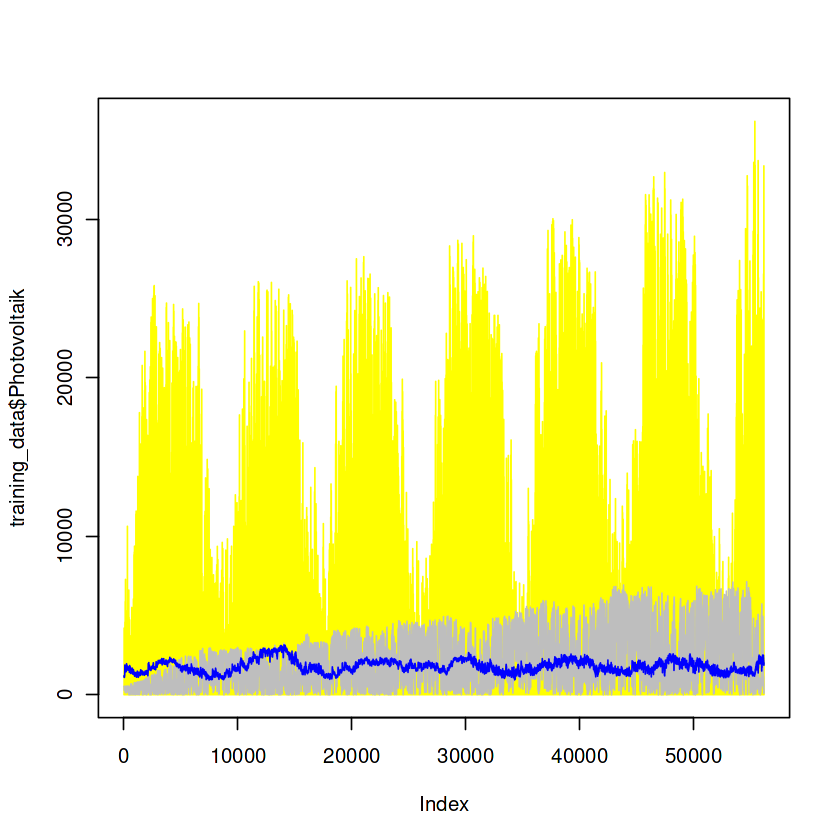

In [30]:
plot(training_data$Photovoltaik,type="l",col="yellow")
lines(training_data$Wind_Offshore,type="l",col="gray")
lines(training_data$Wasserkraft,type="l",col="blue")

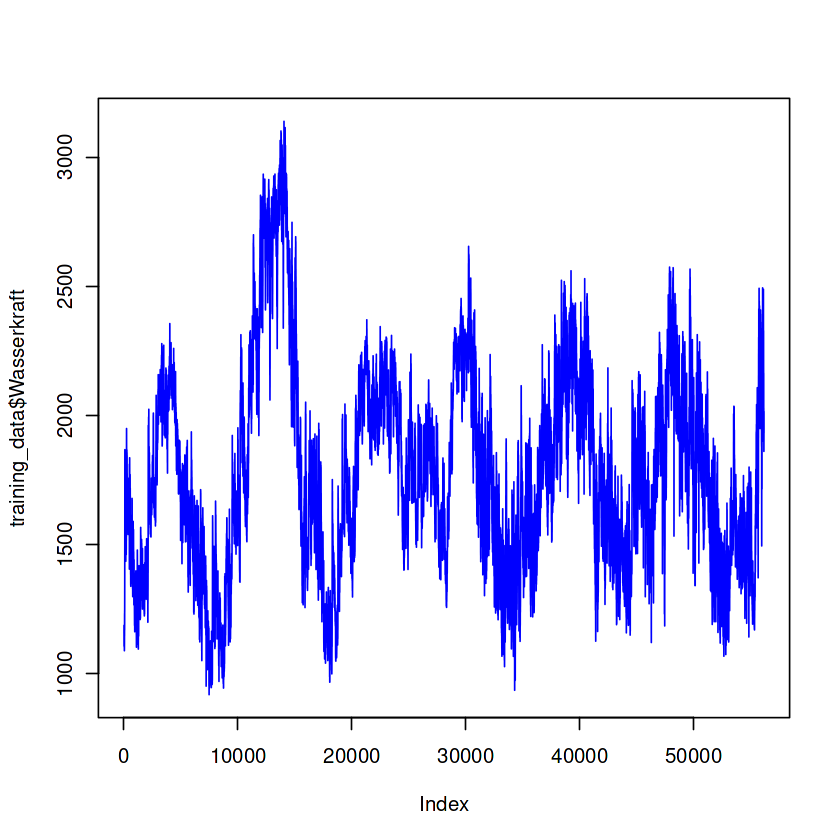

In [26]:
plot(training_data$Wasserkraft,type="l",col="blue")

In [50]:
aggregate(training_data$Wasserkraft, list(training_data$year), FUN=mean)

Group.1,x
<date>,<dbl>
2015-01-01,1144.292
2015-01-02,1128.656
2015-01-03,1297.323
2015-01-04,1758.844
2015-01-05,1587.188
2015-01-06,1506.375
2015-01-07,1477.604
2015-01-08,1493.302
2015-01-09,1520.146


In [40]:
 tData_long <- training_data %>%
   gather(key = "variable", value = "value", -Time, -year,- Ende)

In [41]:
head(tData_long)

Time,Ende,year,variable,value
<chr>,<time>,<date>,<chr>,<dbl>
2015-01-01_00:00:00,01:00:00,2015-01-01,Biomasse,4024.25
2015-01-01_01:00:00,02:00:00,2015-01-01,Biomasse,3982.75
2015-01-01_02:00:00,03:00:00,2015-01-01,Biomasse,4019.50
2015-01-01_03:00:00,04:00:00,2015-01-01,Biomasse,4040.75
2015-01-01_04:00:00,05:00:00,2015-01-01,Biomasse,4037.75
2015-01-01_05:00:00,06:00:00,2015-01-01,Biomasse,4028.25


In [42]:
tail(tData_long)

Time,Ende,year,variable,value
<chr>,<time>,<date>,<chr>,<dbl>
2021-05-30_18:00:00,19:00:00,2021-05-30,Sonstige_Konventionelle,1369.50
2021-05-30_19:00:00,20:00:00,2021-05-30,Sonstige_Konventionelle,1350.50
2021-05-30_20:00:00,21:00:00,2021-05-30,Sonstige_Konventionelle,1339.00
2021-05-30_21:00:00,22:00:00,2021-05-30,Sonstige_Konventionelle,1356.50
2021-05-30_22:00:00,23:00:00,2021-05-30,Sonstige_Konventionelle,1355.75
2021-05-30_23:00:00,00:00:00,2021-05-30,Sonstige_Konventionelle,1355.75


In [51]:
summary_df <- tData_long %>%
  group_by(year,variable) %>%
  summarize(Total_Value = sum(value))
head(summary_df)

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,variable,Total_Value
<date>,<chr>,<dbl>
2015-01-01,Biomasse,96341.25
2015-01-01,Braunkohle,314599.00
2015-01-01,Erdgas,23806.00
2015-01-01,Kernenergie,251485.25
2015-01-01,Photovoltaik,17080.25
2015-01-01,Pumpspeicher,23683.50


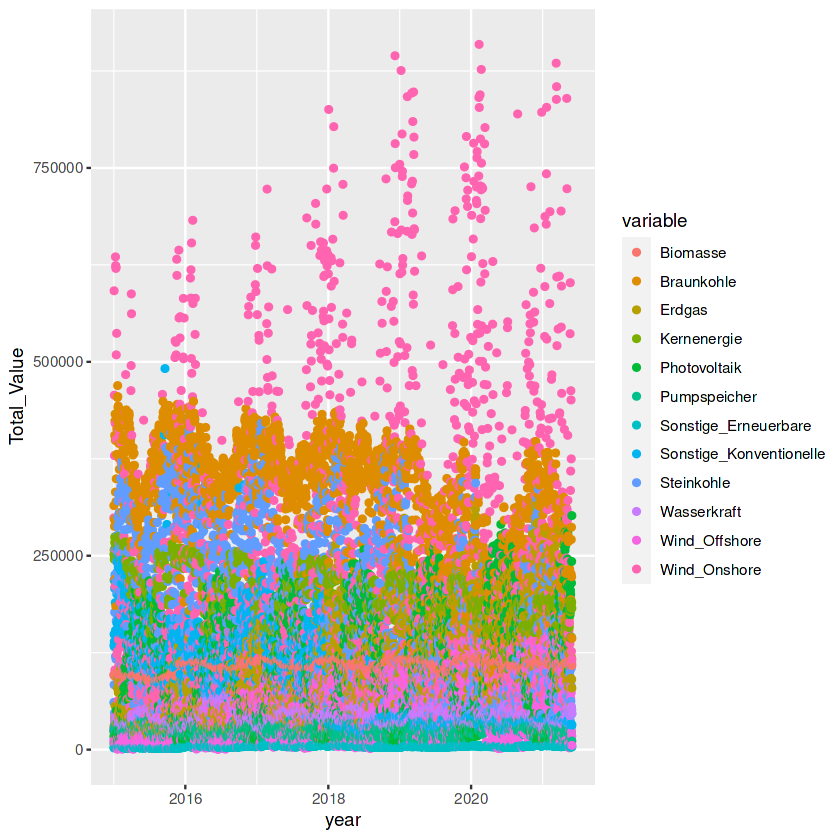

In [53]:
summary_df %>%
  ggplot( aes(x=year, y=Total_Value, group=variable, color=variable)) +
    geom_point()

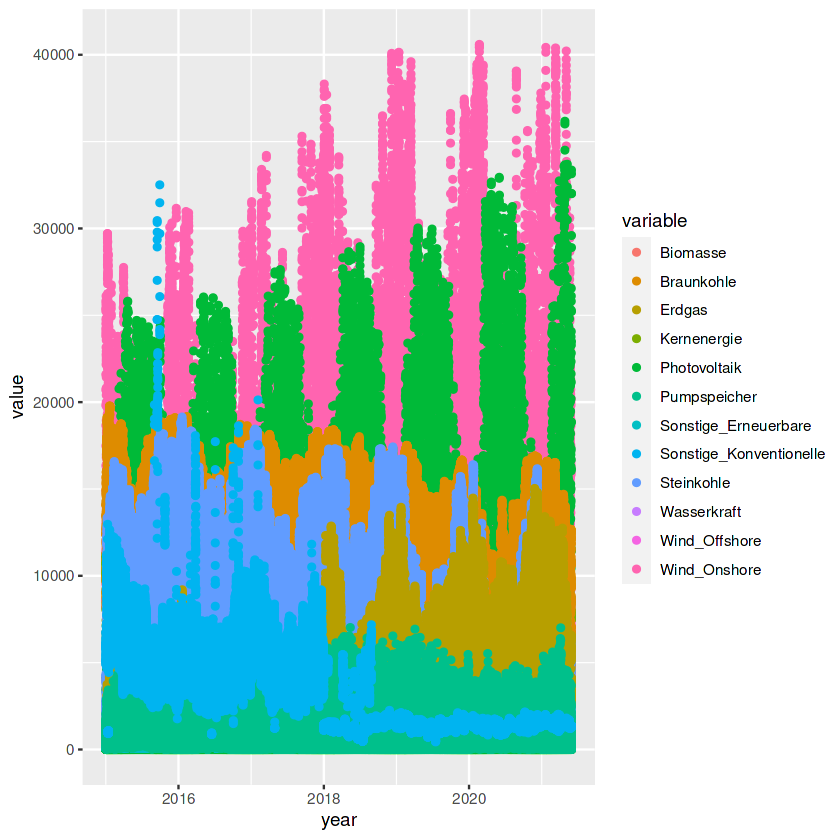

In [44]:
tData_long %>%
  ggplot( aes(x=year, y=value, group=variable, color=variable)) +
    geom_point()

In [45]:
tData_longSum=summarise(tData_long, variable_name=year) 

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”


In [48]:
tData_long_sum = aggregate(tData_long$value, by=list(tData_long$year), sum)

In [49]:
tData_long_sum

Group.1,x
<date>,<dbl>
2015-01-01,1262749
2015-01-02,1499551
2015-01-03,1405097
2015-01-04,1320111
2015-01-05,1509716
2015-01-06,1512748
2015-01-07,1647952
2015-01-08,1730101
2015-01-09,1730532
